## Imports

In [1]:
from ipynb.fs.full.Main import *

# Bell States

Bell states are quantum states of two qubits that represent the maximally entangled states possible. The four Bell states form what is called the [Bell basis](https://en.wikipedia.org/wiki/Bell_state#Bell_basis), which form the maximally entangled basis for two qubits. In this circuit, the first Bell state is prepare. This state is entangled, meaning that measuring one qubit will immediately tell you the state of the other one. In this case, the states of both qubits will match 100% percent of the time. Thus, if you measure one qubit to be in the state |0>, you will know that the other one is in the state |0> too; and the same way for |1>. 

The code used to generate this circuit is the following:

In [2]:
def bell_state():
    qreg = QuantumRegister(2, 'q')
    creg = ClassicalRegister(2, 'c')
    qc   = QuantumCircuit(qreg, creg)

    # Create bell state itself by putting first qubit into superposition and then applying a CNOT gate between the two qubits
    qc.h(qreg[0])
    qc.cx(qreg[0], qreg[1])

    # Measure both qubits
    qc.measure(qreg[0], creg[0])
    qc.measure(qreg[1], creg[1])

    # Return circuit
    return qc

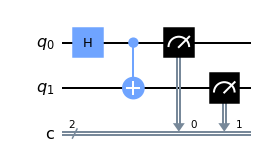

In [3]:
circ = bell_state()
draw(circ)

The Hadamard gate puts the first qubit into an equal superposition of states |0> and |1>. The second gate is a CNOT, which is a controlled-not gate, meaning that it will flip the target qubit (the second one in this case) only if the control qubit (the first one) is in state |1>. Since our control qubit is in a superposition of |0> and |1>, the target qubit will be flipped with the same equal probability. This also means that measuring a |0> in the top qubit means that the second qubit was **not** flipped and therefore stayed in the |0> state, but if we measure the first qubit to be in the |1> state, we know that the second qubit was flipped and therefore is in the |1> state. 

And here is an histogram obtained from measuring the two qubits into classical bits. We can see that there was a 50-50 chance of getting either |00> or |11> (without considering noise from the quantum computer).

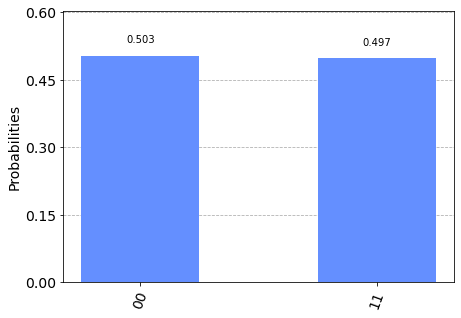

In [12]:
result, counts = run(circ)
plot_histogram(counts)